### Libraries

In [17]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from lib import analysis
from scipy import stats


### Data

In [10]:
user_col = 'user'
item_col = 'item'
predict_col = 'rating'

In [3]:
location = 'data/'
ratings = pd.read_csv(
    location + 'fairbook/fairbook_events.csv', header=0,
)

In [11]:
analysis.users_and_items(ratings, user_col, item_col)
user_dist, num_users = analysis.user_distribution(ratings, user_col, item_col, verbose=True)
item_dist, num_items = analysis.item_distribution(ratings, user_col, item_col, verbose=True)
item_rating_dist = analysis.item_rating(ratings,item_col, predict_col, verbose=True)

No. user events: 88552
No. items: 6921
No. users: 6358


Mean items per user: 13.9
Min items per user: 5
Max items per user: 153


Mean users per item: 12.8
Min users per item: 5
Max users per item: 350


Mean rating per item: 7.8
Min rating per item: 2.8
Max rating per item: 10.0




In [12]:
df_item_dist = pd.DataFrame(item_dist)
df_item_dist.columns = ['count']

In [13]:
full_item_dist = pd.merge(df_item_dist, item_rating_dist, left_index=True, right_index=True)


hi
hi


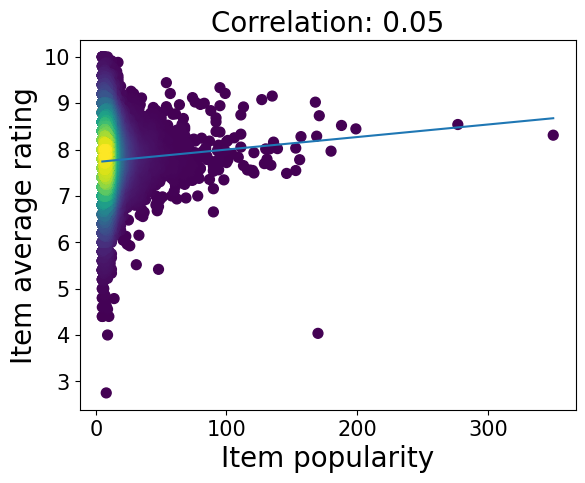

In [20]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

# plot: item rating vs popularity

x = full_item_dist['count'].values
y = full_item_dist.rating.values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * np.array(x) + intercept
# Calculate the point density
print('hi')
xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)
print('hi')
fig, axs = plt.subplots(1, 1)
axs.plot(x, line)
axs.set_xlabel("Item popularity",fontsize=20)
axs.set_ylabel("Item average rating",fontsize=20)
axs.set_title('Correlation: ' + str(round(r_value,2)),fontsize=20)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
axs.scatter(x, y, c=z, s=50)
# axs.scatter(x, y, s=50)

### Relationship between rating and popularity

In [ ]:
x = item_characteristics.dropna(axis=0)["count"].values
y = item_characteristics.dropna(axis=0)["rating"].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * np.array(x) + intercept
# Calculate the point density
xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)

fig, axs = plt.subplots(5, 2)
axs[0,0].plot(x, line)
axs[0,0].set_xlabel("Item popularity",fontsize=20)
axs[0,0].set_ylabel("Item average rating",fontsize=20)
axs[0,0].set_title('Correlation: ' + str(round(r_value,2)),fontsize=20)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
axs[0,0].scatter(x, y, c=z, s=50)
    

### Preferences of users with large profiles

In [ ]:
x = user_characteristics.dropna(axis=0)["user_hist"].values
y = user_characteristics.dropna(axis=0)["score_vs_pop"].values


slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * np.array(x) + intercept
# Calculate the point density
xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)


axs[3,0].plot(x, line)
axs[3,0].set_xlabel("User profile size",fontsize=20)
axs[3,0].set_ylabel("User liking for popular items",fontsize=20)
axs[3,0].set_title('Correlation: ' + str(round(r_value,2)),fontsize=20)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
axs[3,0].scatter(x, y, c=z, s=50)